#**Spotify**

####This project is an analysis on...

By Thalia Dominguez, Nicholas Phan, & Edith Magana

In [361]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/Project 2 DS-Spotify/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load the Data

In [362]:
all_df = pd.read_csv(drive_dir + 'data/data.csv')

In [363]:
normalize_df = pd.read_csv(drive_dir + 'data/normalize_data.csv')

In [364]:
by_genres_df = pd.read_csv(drive_dir + 'data/data_by_genres.csv')

In [365]:
by_year_df = pd.read_csv(drive_dir + 'data/data_by_year.csv')

In [366]:
by_artist_df = pd.read_csv(drive_dir + 'data/data_by_artist.csv')

In [367]:
with_genres_df = pd.read_csv(drive_dir + 'data/data_w_genres.csv')

#Cleaning the Data

First, let's check if there are any None or NaN values in all datasets.

In [368]:
all_df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [369]:
by_genres_df.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [370]:
by_year_df.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [371]:
by_artist_df.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [372]:
#There are actually a few entries under genres that is an empty bracket
with_genres_df.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

We don't have any NaN values in our data sets! Now, let's check the data types for each DataFrame to see if they match. 

In [373]:
all_df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [374]:
by_genres_df.dtypes

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [375]:
by_year_df.dtypes

year                  int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [376]:
by_artist_df.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
dtype: object

In [356]:
with_genres_df.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

In [358]:
all_df = all_df.drop(['artists', 'id', 'name', 'release_date'], axis=1)

In [377]:
all_df = all_df[all_df['popularity'] != 0]

In [378]:
all_df['cut'] = pd.qcut(all_df['popularity'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

#Looking at the individual data by year

In [ ]:
def lregg(df,term):
  lr = LinearRegression()
  X = df[term].values.reshape(-1,1)
  return lr.fit(X, y=df['popularity'])



In [ ]:
def r_squared(term, df):
  return np.corrcoef(df['popularity'], df[term])[0,1]**2


In [ ]:
def loss_value_avg(lr, df, N, x_col, y_col='popularity'):
    diff = 0
    for i in range(N):
        actual_x = all_df[x_col].iloc[i]
        actual_y = all_df[y_col].iloc[i]
        predicted_y = lr.predict(actual_x.reshape(-1, 1))
        diff = diff + np.abs(actual_y - predicted_y) # Absolute value
    return diff[0] / N

In [ ]:
def year_df(df, year):
  new_df = df[df['year'] == year]
  return new_df

#PCA Analysis

In [ ]:
def pca(df):
  scaler = StandardScaler()

  features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
  x = df.loc[:, features].values
# Separating out the target
  y = df.loc[:,['popularity']].values
# Standardizing the features
  x = StandardScaler().fit_transform(x)

  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(x)

  pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
  pca_df['popularity'] = df['popularity'].tolist()

  pca_df['quartile'] = pd.qcut(pca_df['popularity'], q=4, labels=['not_popular', '2nd_q', '3rd_q', 'popular'])
  pca_quart_df = pca_df.drop('popularity', axis = 1)

  return pca_quart_df

In [ ]:
def pca_scatter(df, title):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title(f'2 Component PCA {title}', fontsize = 20)

  targets = ['not_popular','popular']
#targets = ['popular']
  colors = ['r', 'g']
#colors = ['g']
  for target, color in zip(targets,colors):
    indicesToKeep = df['quartile'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50, alpha = .5)
  ax.legend(targets)
  ax.grid()

In [ ]:
def pca_box(df,quart):
  df[df['quartile'] == quart].boxplot()

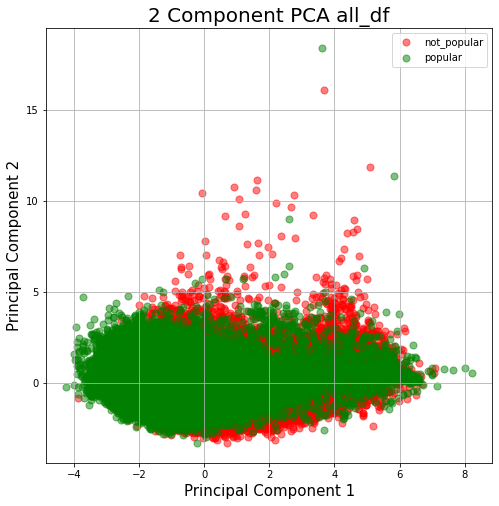

In [ ]:
pca_all_df = pca(all_df)
pca_scatter(pca_all_df, 'all_df')

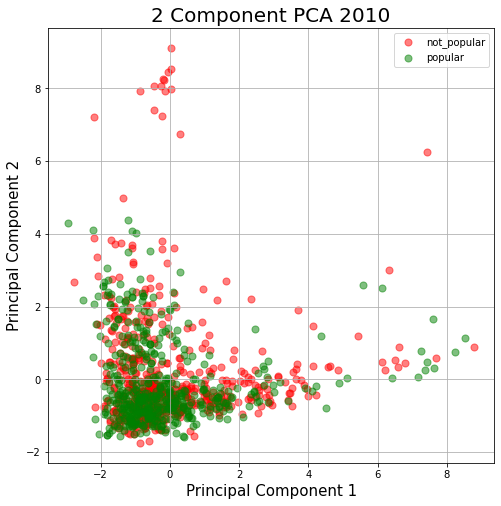

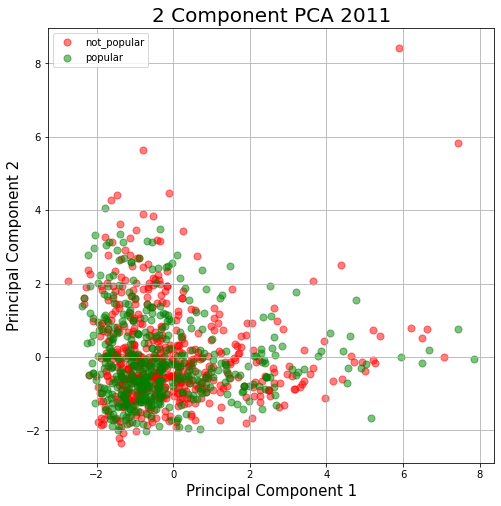

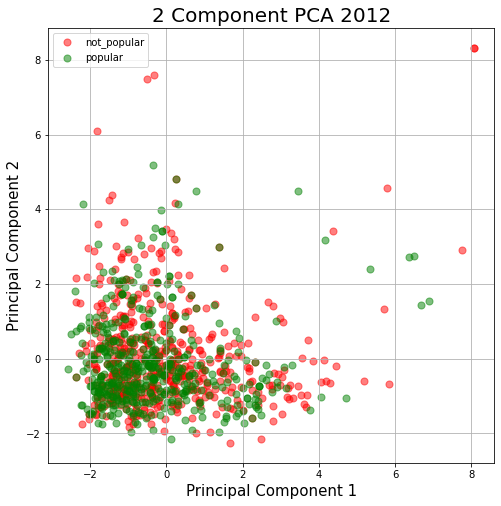

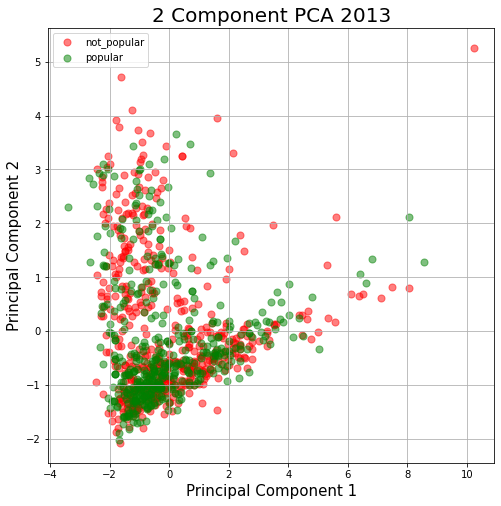

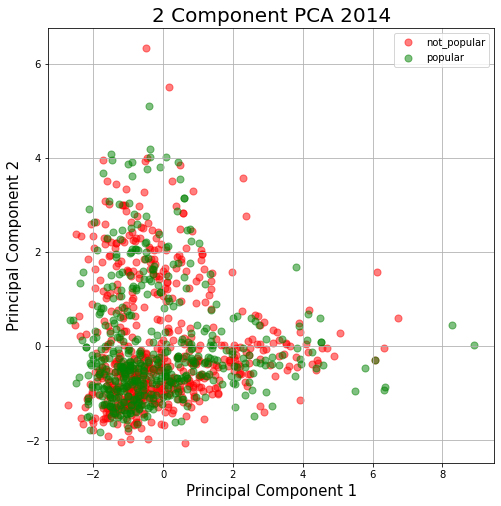

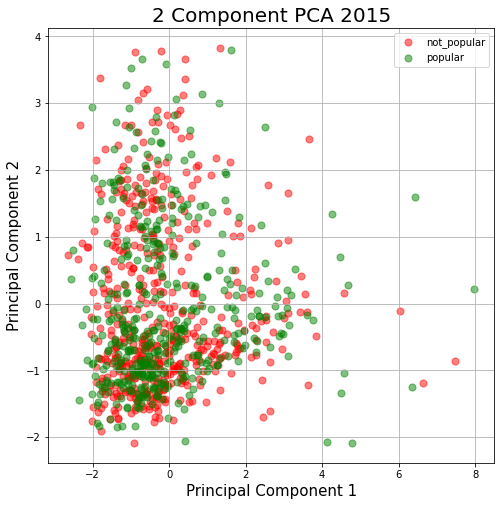

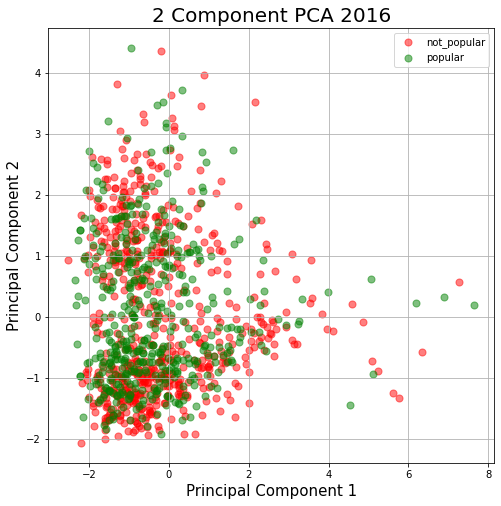

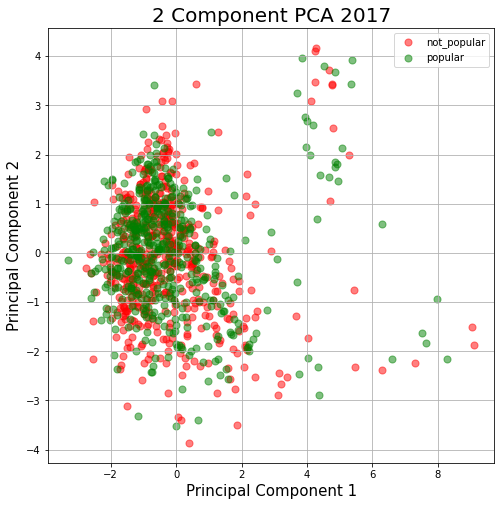

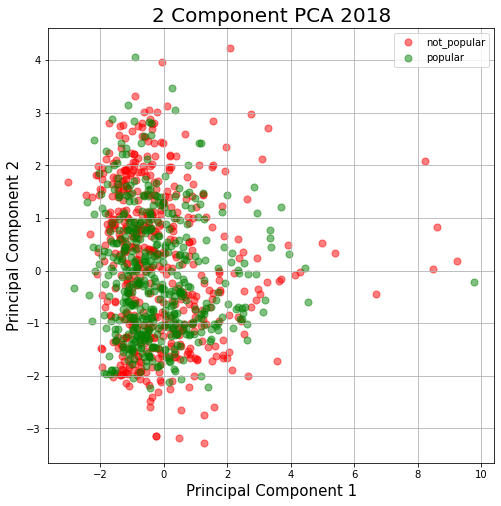

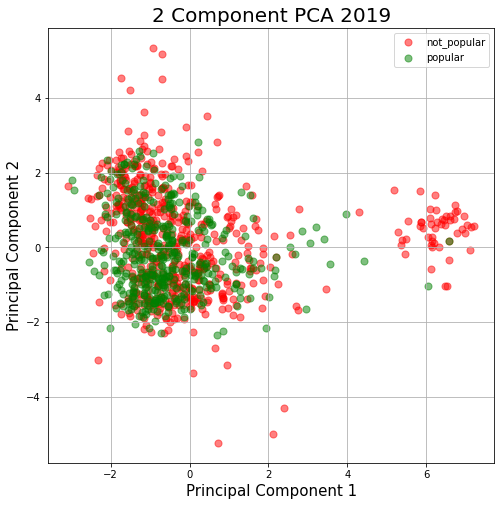

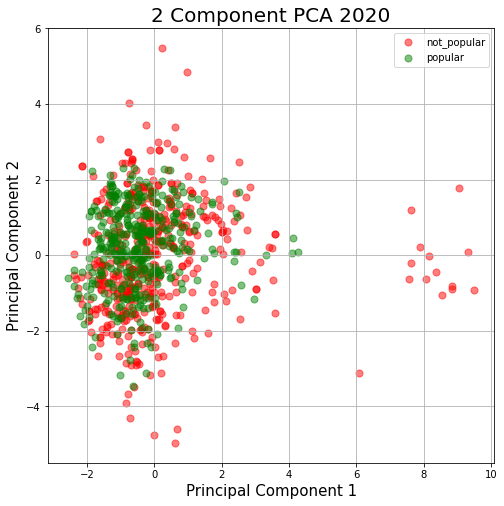

In [ ]:
for i in range(2010,2021):
  df = year_df(all_df, i)
  pca_df = pca(df)
  pca_scatter(pca_df, i)

# Looking at histograms of popular vs. attributes and not popular vs. attributes

In [ ]:
def histogram(df, att):

  df['cut'] = pd.qcut(df['popularity'], q=10, labels=['not_popular', '2', '3', '4', '5', '6', '7', '8', '9', 'popular'])
  #df['quartile'] = pd.qcut(df['popularity'], q=4, labels=['not_popular', '2nd_q', '3rd_q', 'popular'])
  fig, axes = plt.subplots(4, 1)
  c = ['r', 'g', 'b', 'y']
  q = ['not_popular', '3', '8', 'popular']
  #q = ['not_popular', '2nd_q', '3rd_q', 'popular']
  for i in range(len(q)):
    #df[df['quartile'] == q[i]][att].plot(kind = 'hist', ax = axes[i], title = f'{q[i].title()} ({att})', figsize = (8,8), color = c[i])
    df[df['cut'] == q[i]][att].plot(kind = 'hist', ax = axes[i], title = f'{q[i].title()} ({att})', figsize = (8,8), color = c[i])

  fig.tight_layout()

In [ ]:
col = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence']

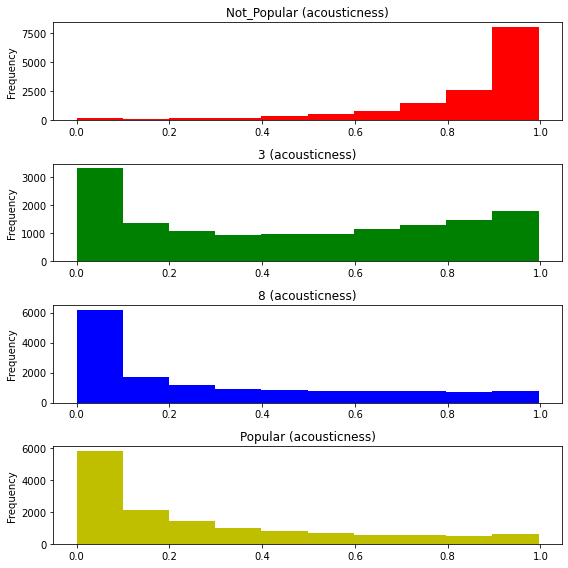

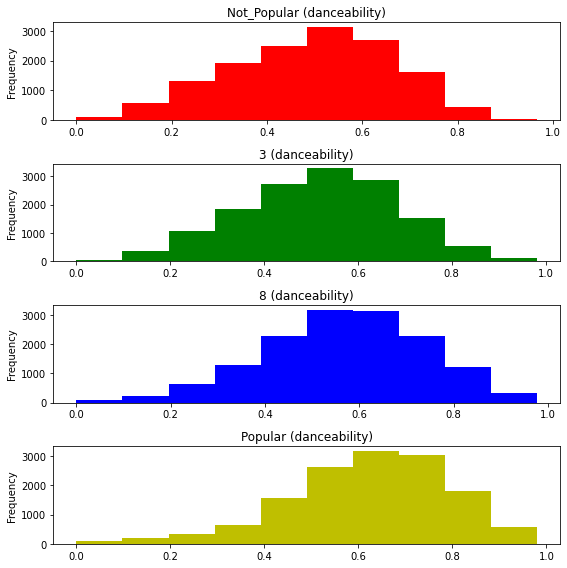

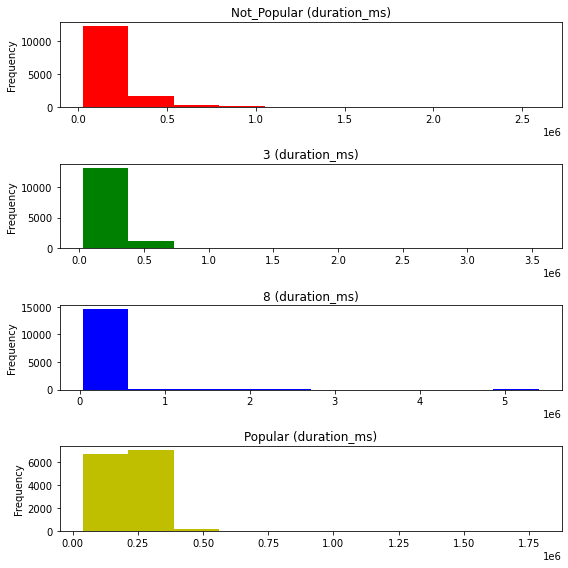

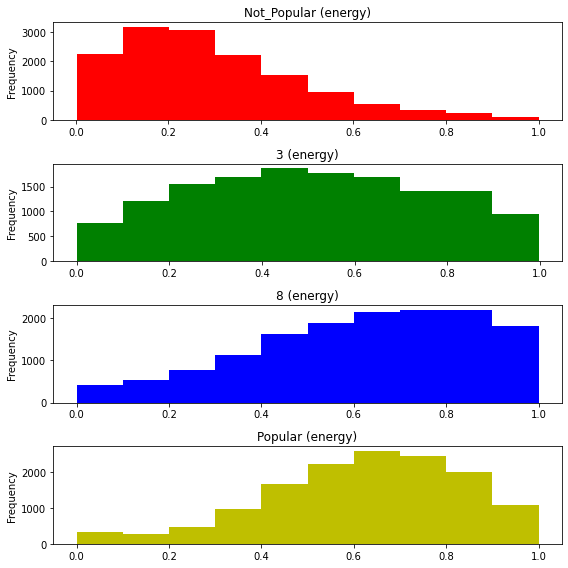

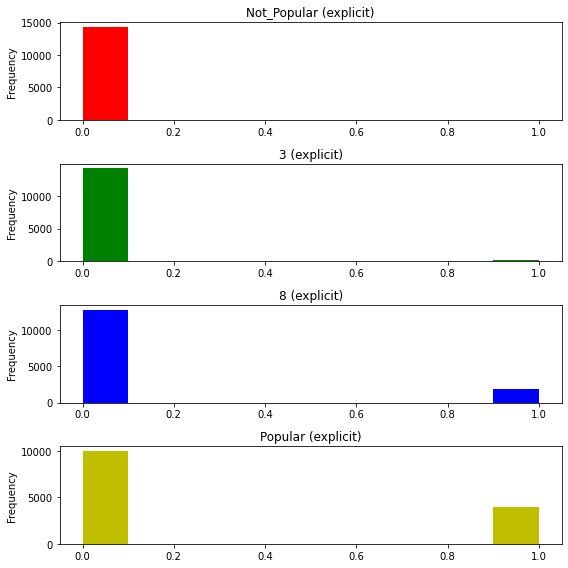

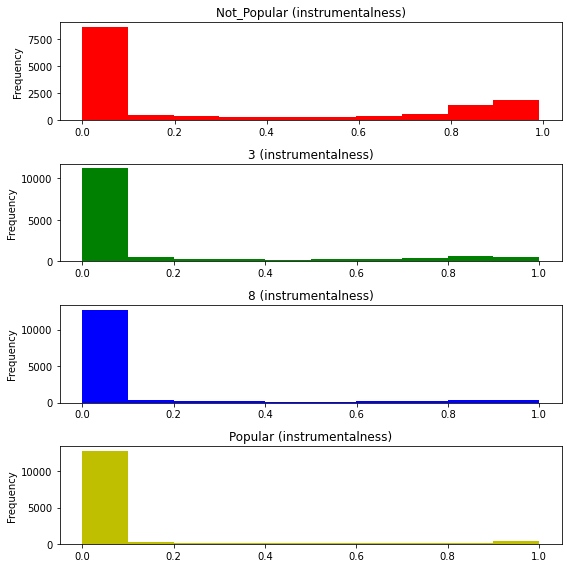

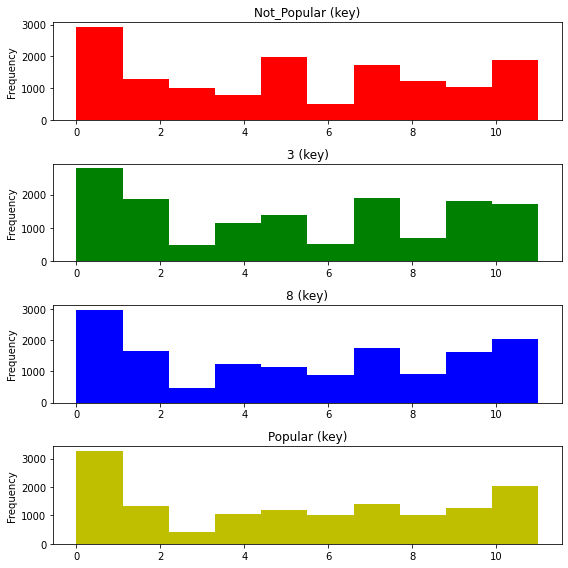

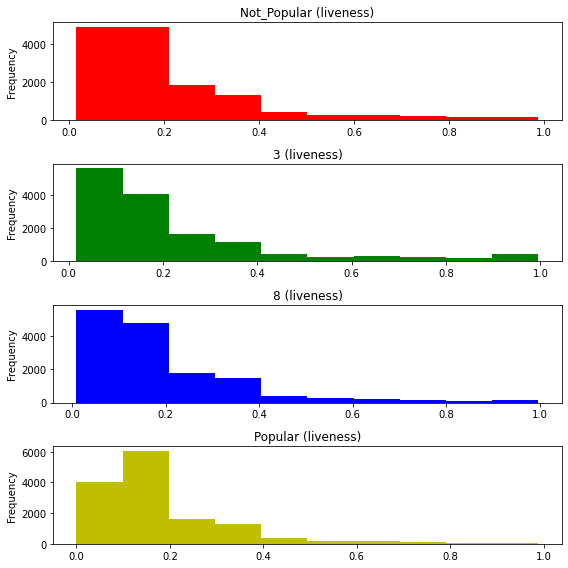

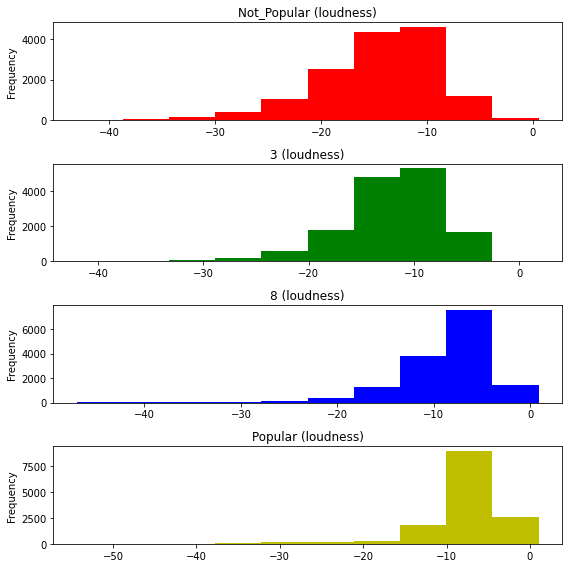

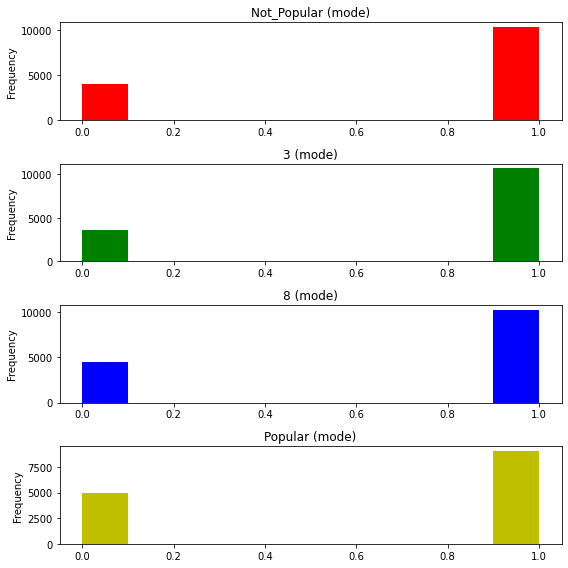

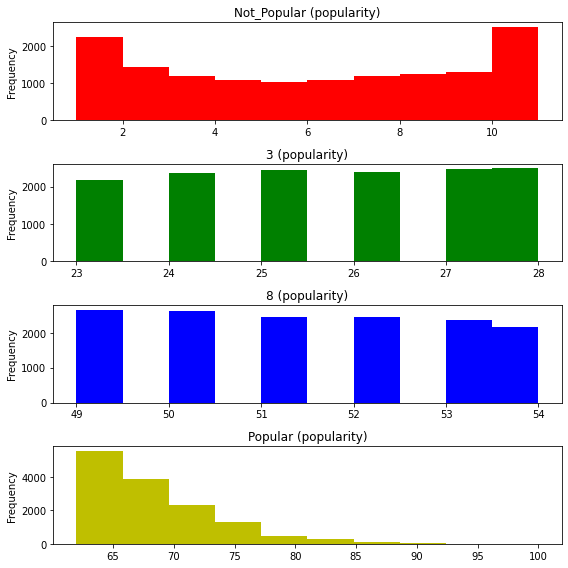

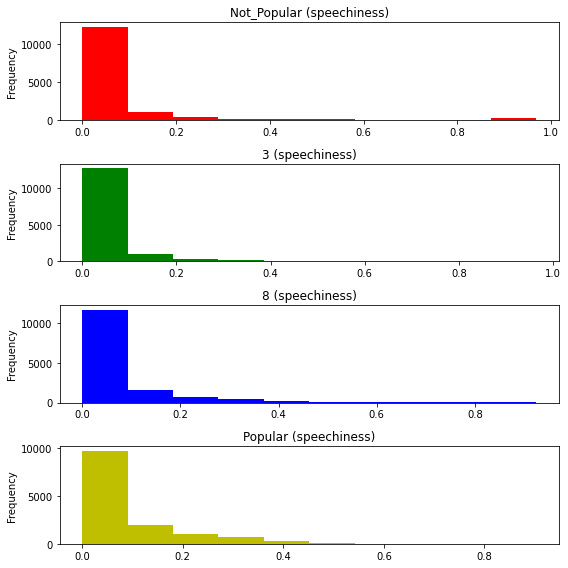

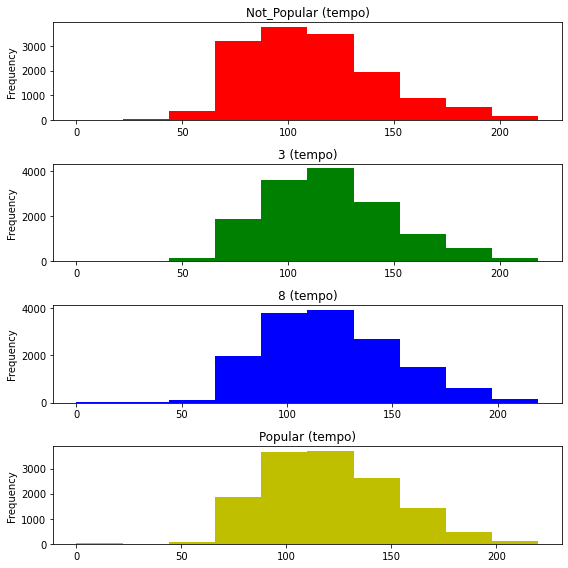

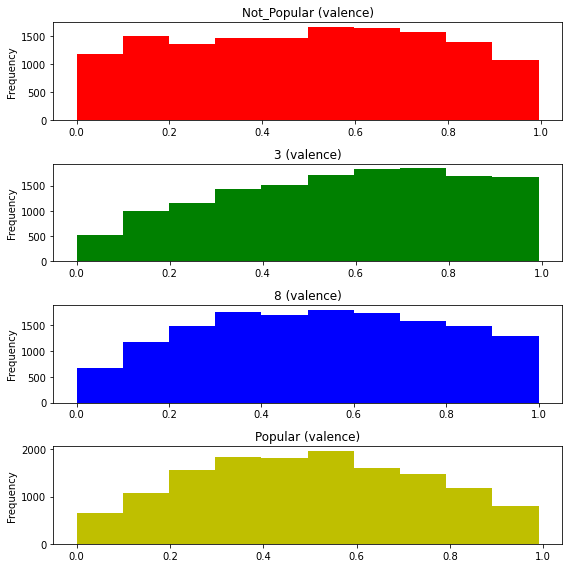

In [ ]:
for att in col:
  histogram(all_df, att)

#Attribute
In this section, I will look to see what the mean of each column looks like across each year (looking at the overall trend for each column over the years)

In [ ]:
def mean_line(df, att):
  years = df['year'].unique()
  years.sort()
  mean = []
  for y in years:
    y_df = year_df(df,y)
    mean.append(y_df[att].mean())

  plt.plot(years, mean)
  plt.title(att.title())
  plt.figure(figsize =(8,8))


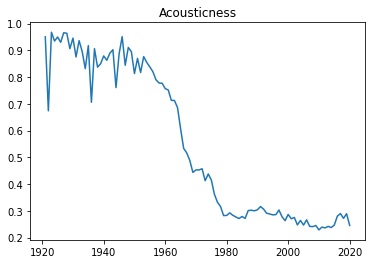

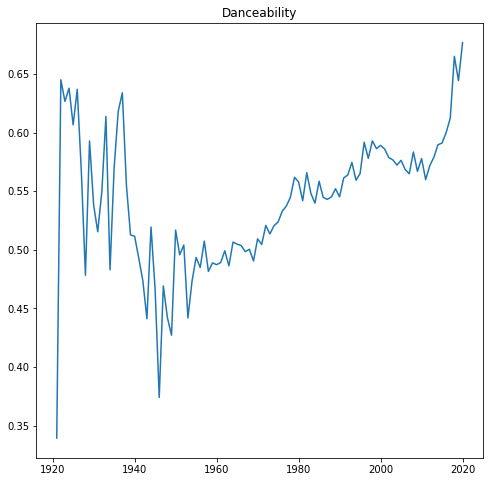

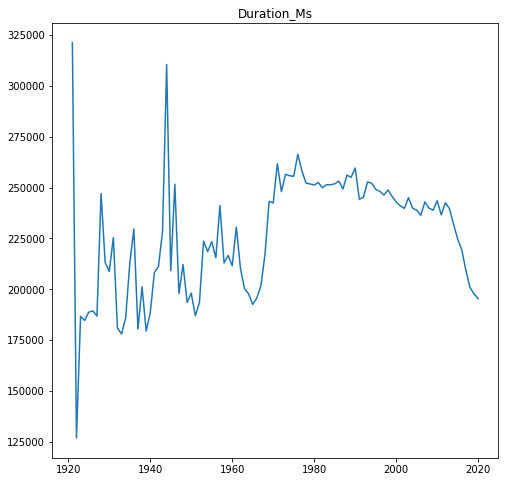

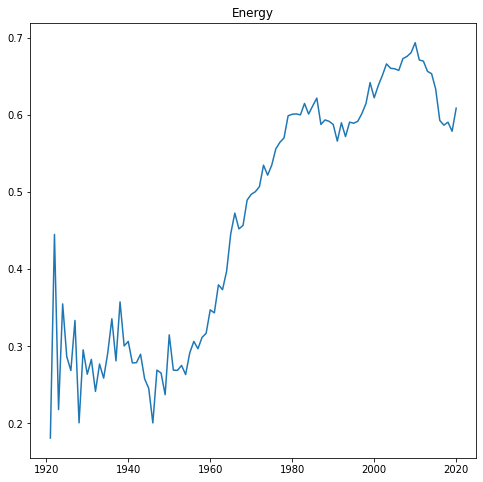

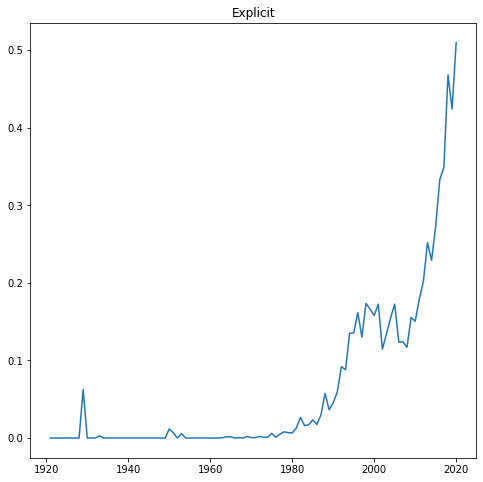

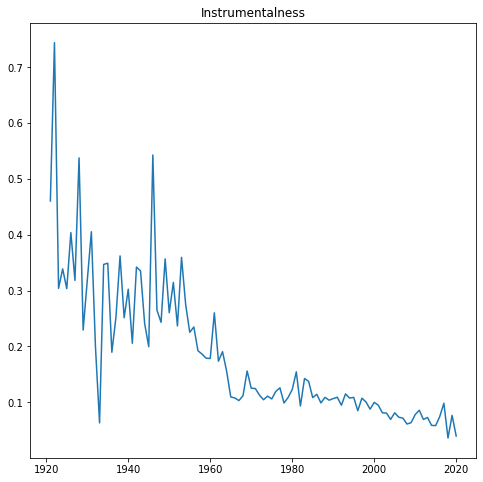

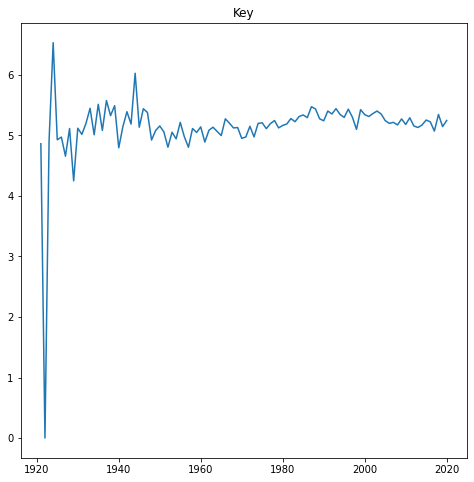

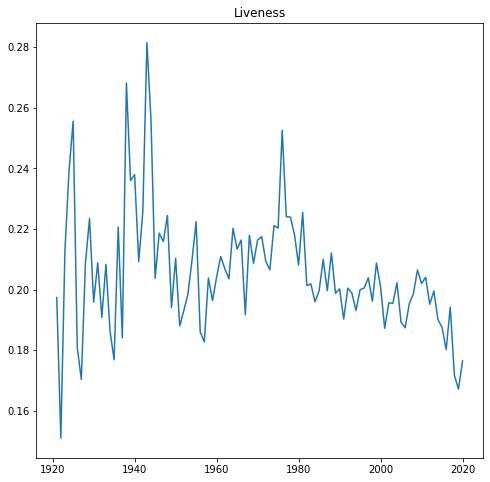

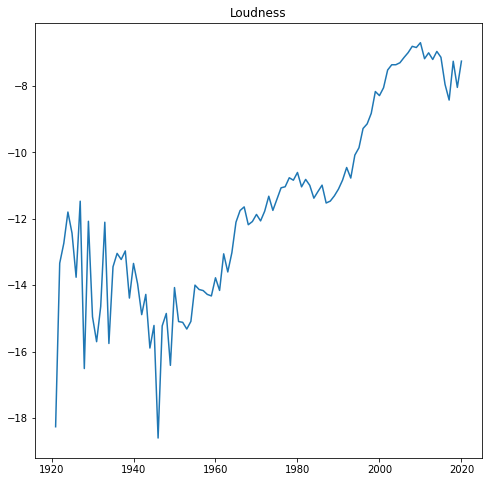

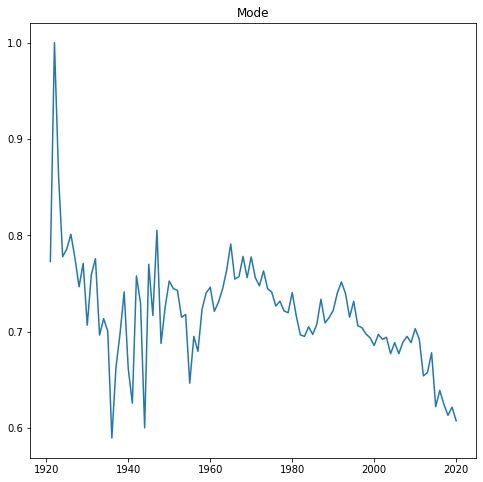

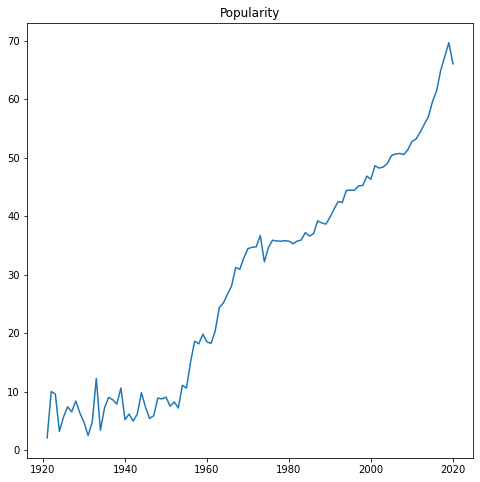

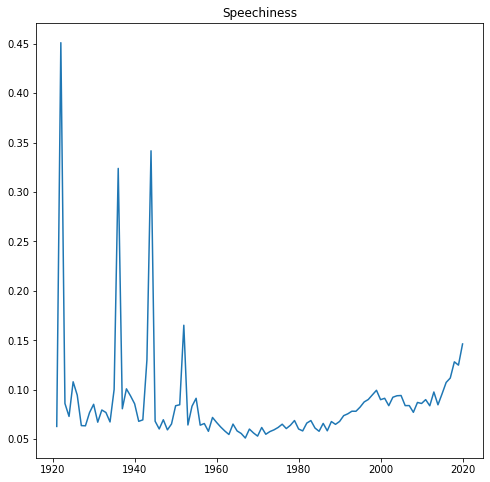

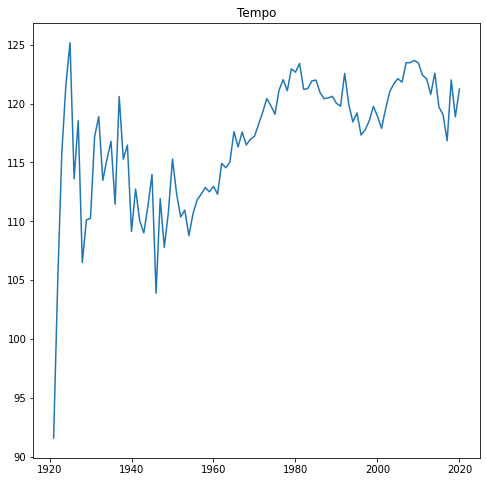

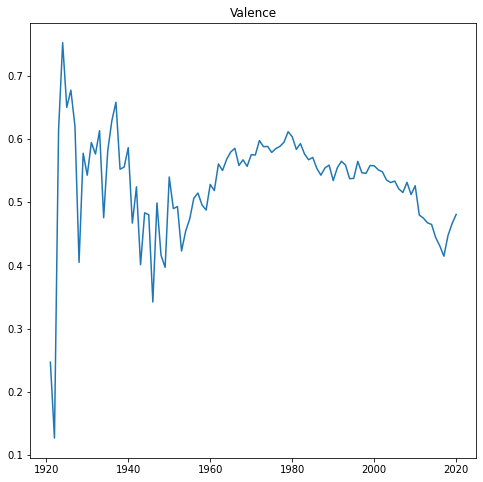

<Figure size 576x576 with 0 Axes>

In [ ]:
for att in col:
  mean_line(all_df, att)


##Same thing, but looking at the trend for each column by mean and popularity. (looking at top 10% of songs by popularity and bottom 10% of songs for that year by popularity)

In [ ]:
#many years before 1954 contain the majority of songs with 1 popularity, so qcut does not work for them
def mean_line_pop(df,att, begin_year = 1954):
  years = []
  mean_popular = []
  mean_not_popular = []
  for y in range(begin_year,2021):
    y_df = year_df(df,y)
    y_df['cut'] = pd.qcut(y_df['popularity'], q=10, labels=['not_popular', '2', '3', '4', '5', '6', '7', '8', '9', 'popular'])
    #df['cut'] = pd.qcut(df['popularity'], q=4, labels=['not_popular', '2', '3', 'popular'])
    popular_df = y_df[y_df['cut'] == 'popular']
    not_popular_df = y_df[y_df['cut'] == 'not_popular']
    years.append(y)
    mean_popular.append(popular_df[att].mean())
    mean_not_popular.append(not_popular_df[att].mean())

  plt.plot(years, mean_popular, label = 'popular')
  plt.plot(years, mean_not_popular, label = 'not_popular')
  plt.title(f'{att.title()}')
  plt.legend()
  plt.figure(figsize =(8,8))


Streaming output truncated to the last 5000 lines.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

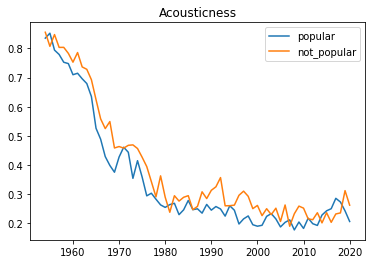

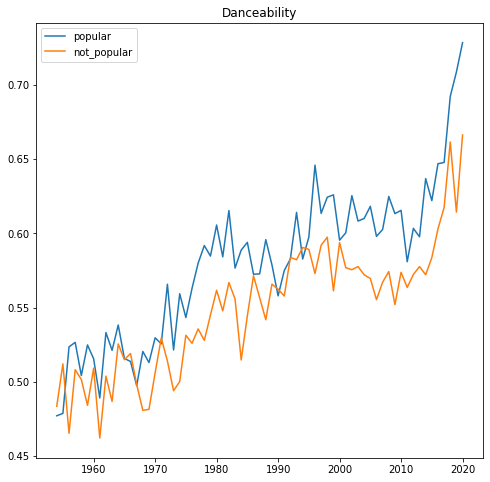

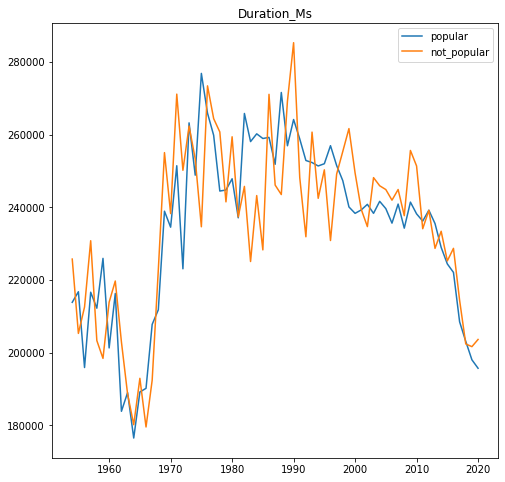

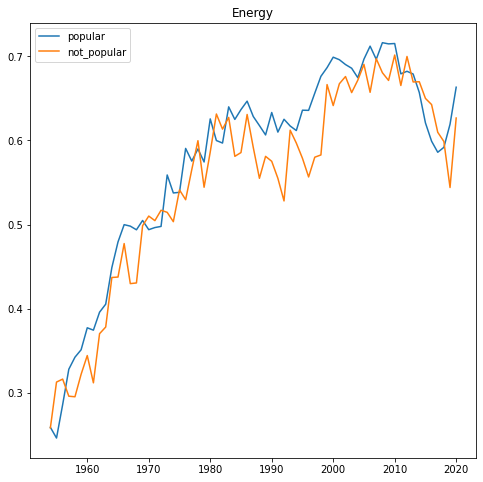

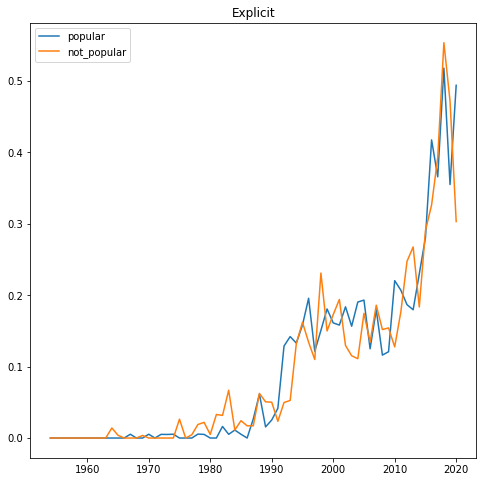

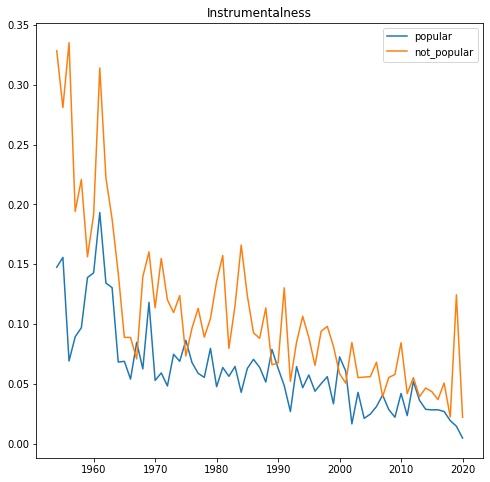

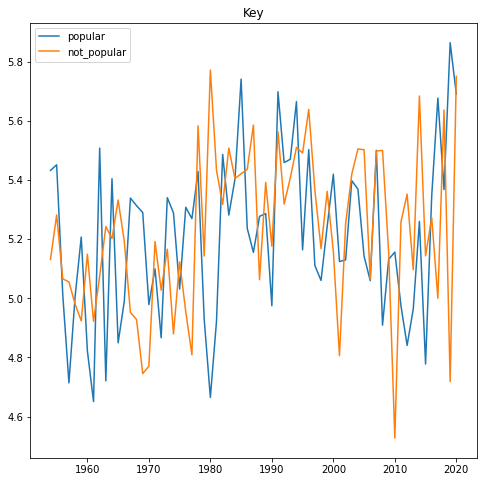

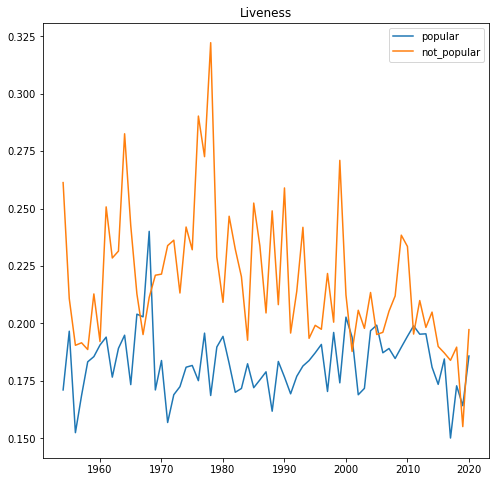

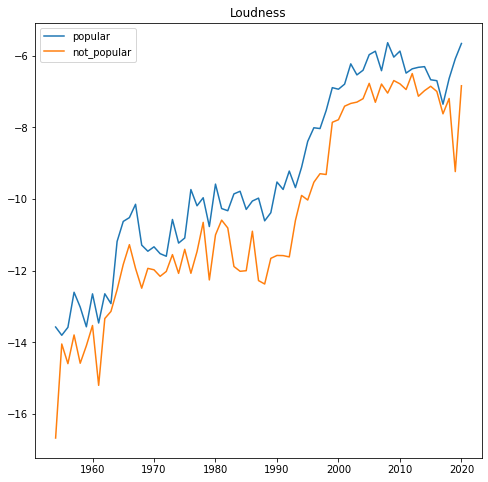

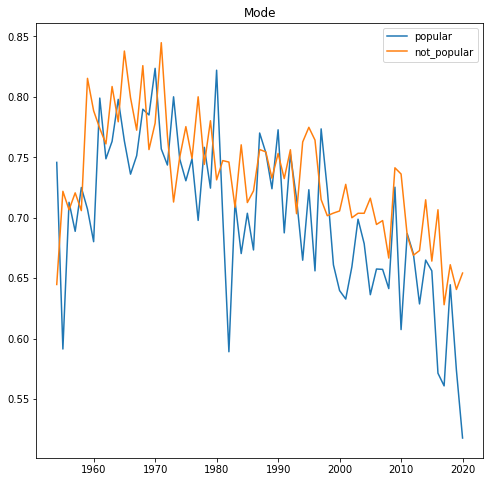

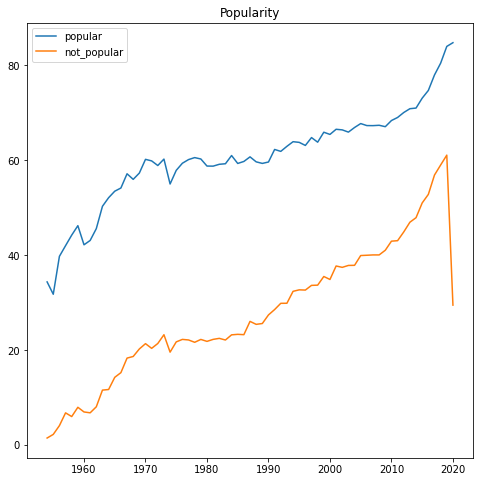

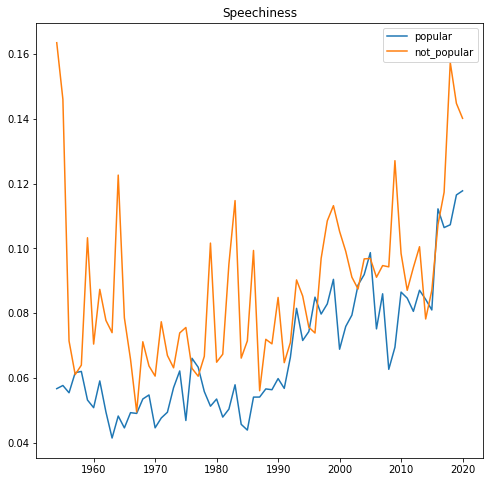

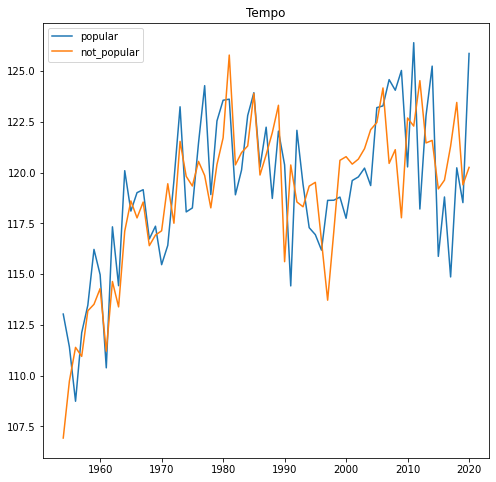

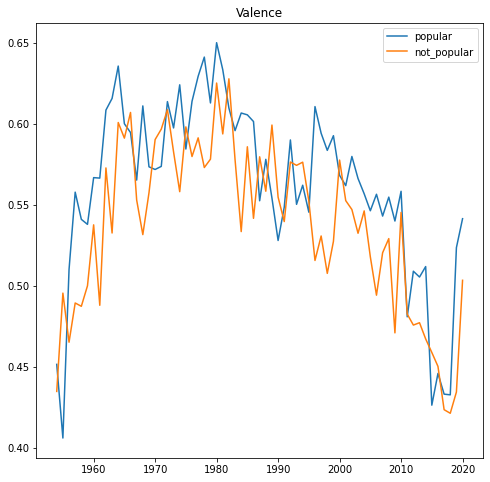

<Figure size 576x576 with 0 Axes>

In [ ]:
for att in col:
  mean_line_pop(all_df,att)


#Attepmt to scale popularity by year. 
Popularity is calculated so that more recent songs have a higher popularity than older songs. My thinking is that the popularity for a song that was released in 2010 and was very popular in 2010 is not reflected because it is an older song. I want to trend the data so that the year it was released does not hurt or help it's popularity (especially for songs in 2000 and up).

In [ ]:
y_df = year_df(all_df, 1922)
x_df = year_df(all_df, 1930)
print(np.var(y_df['popularity']), np.var(x_df['popularity']))

0.0 33.57869590160982


In [ ]:
all_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,cut
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928,not_popular
11,0.989,0.170,85133,0.0823,0,0.911,10,0.0962,-30.107,0,1,0.0317,85.989,0.3460,1928,not_popular
40,0.977,0.305,215267,0.0830,0,0.697,6,0.2310,-20.895,1,1,0.0331,80.622,0.0479,1928,not_popular
42,0.990,0.337,333907,0.0699,0,0.903,5,0.1060,-23.806,0,2,0.0322,72.133,0.1350,1928,not_popular
47,0.985,0.355,138013,0.0452,0,0.825,1,0.1530,-24.125,1,2,0.0329,84.551,0.2760,1928,not_popular


In [ ]:
years = all_df['year'].unique().tolist()
years.sort()
for n, group in all_df.groupby('cut'):
  for y in years:
    percent = 100*(group[group['year'] == y].shape[0]/group.shape[0])
    print(f'{y} has {percent:.2f}% of all {n}')

1921 has 0.15% of all 1
1922 has 0.01% of all 1
1923 has 0.52% of all 1
1924 has 0.31% of all 1
1925 has 0.78% of all 1
1926 has 1.18% of all 1
1927 has 0.43% of all 1
1928 has 1.11% of all 1
1929 has 0.30% of all 1
1930 has 2.14% of all 1
1931 has 0.37% of all 1
1932 has 1.00% of all 1
1933 has 1.42% of all 1
1934 has 1.13% of all 1
1935 has 1.68% of all 1
1936 has 2.52% of all 1
1937 has 1.34% of all 1
1938 has 0.91% of all 1
1939 has 1.72% of all 1
1940 has 1.95% of all 1
1941 has 1.12% of all 1
1942 has 2.02% of all 1
1943 has 0.73% of all 1
1944 has 0.94% of all 1
1945 has 2.62% of all 1
1946 has 2.87% of all 1
1947 has 1.87% of all 1
1948 has 1.70% of all 1
1949 has 3.90% of all 1
1950 has 3.05% of all 1
1951 has 4.20% of all 1
1952 has 3.76% of all 1
1953 has 4.78% of all 1
1954 has 5.52% of all 1
1955 has 8.01% of all 1
1956 has 6.60% of all 1
1957 has 4.17% of all 1
1958 has 4.67% of all 1
1959 has 3.40% of all 1
1960 has 4.04% of all 1
1961 has 4.38% of all 1
1962 has 2.90% o

In [ ]:
def scale_pop(df):
  std_all = np.var(df['popularity'])**.5
  mean_all = np.mean(df['popularity'])

  norm_df = pd.DataFrame(columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year', 'cut'] )

  for y in years:
    y_df = df[df['year'] == y]
    pop = y_df['popularity'].tolist()
    new_list = [(x - np.mean(pop))/(np.var(pop))**.5 for x in pop]
    norm_list = [x*std_all+mean_all for x in new_list]
    y_df['popularity'] = norm_list
    norm_df = pd.concat([norm_df,y_df], axis=0)
  
  return norm_df

In [ ]:
norm_df = scale_pop(all_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
norm_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,cut
78068,0.732,0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,94.336241,0.4150,60.936,0.9630,1921,1
78069,0.982,0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,71.438626,0.0366,80.954,0.0594,1921,1
78070,0.941,0.241,196307,0.274,0,0.000008,0,0.0984,-9.750,0,37.092204,0.0297,90.773,0.2120,1921,1
78071,0.957,0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,37.092204,0.0380,101.665,0.2530,1921,1
78072,0.996,0.518,159507,0.203,0,0.000000,0,0.1150,-10.589,1,71.438626,0.0615,66.221,0.4060,1921,1


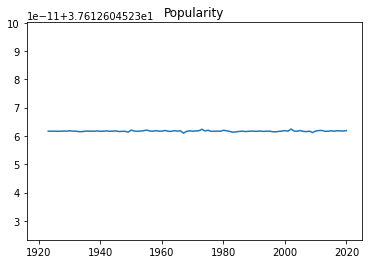

<Figure size 576x576 with 0 Axes>

In [ ]:
#The mean for all the years is now the same, so year is not a factor
#The problem with this is that a song from 1920 is just as popular as a song from 2020
mean_line(norm_df,'popularity')

#Looking at music from 2000-2020
Since we are presenting to record executives, I believe they will be more interested in the more recent trends

In [ ]:
recent_df = all_df[all_df['year']>1999]

In [ ]:
for att in col:
  mean_line_pop(recent_df,att,2000)

In [ ]:
recent_df['cut'] = pd.qcut(recent_df['popularity'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
recent_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,cut
6054,0.97200,0.567,313293,0.227,0,0.601000,10,0.110,-13.441,1,47,0.0290,136.123,0.0396,2000,3
6055,0.32100,0.821,360240,0.418,0,0.000372,9,0.222,-9.841,0,51,0.0407,117.382,0.8030,2000,4
6056,0.00659,0.706,202507,0.602,1,0.000138,11,0.400,-8.306,0,44,0.3420,89.692,0.4790,2000,2
6057,0.00390,0.368,173360,0.977,0,0.000000,11,0.350,-2.757,0,52,0.1270,165.889,0.5480,2000,5
6058,0.12200,0.501,344200,0.511,0,0.000000,7,0.279,-9.836,0,53,0.0291,78.045,0.1130,2000,5


In [ ]:
norm_recent_df = scale_pop(recent_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
norm_recent_df['cut'] = pd.qcut(norm_recent_df['popularity'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

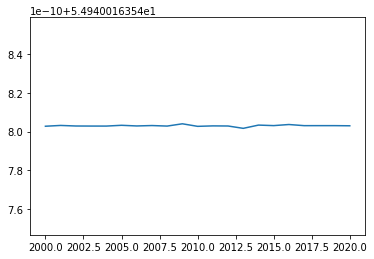

In [ ]:
x = []
y = []

for year,group in norm_recent_df.groupby('year'):
  x.append(year)
  y.append(group['popularity'].mean())
plt.plot(x,y)

#LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def linear_score(df):
  
  train_df, test_df = train_test_split(df, test_size=0.3)
  train_df, valid_df = train_test_split(train_df, test_size=int(0.1*norm_recent_df.shape[0]))

  lr = LinearRegression()

  #danceability, Instrumentalness, liveness, loudness, mode
  X_train = train_df[['danceability', 'instrumentalness', 'liveness', 'loudness', 'mode']]
  y_train = train_df['popularity']

  X_valid = valid_df[['danceability', 'instrumentalness', 'liveness', 'loudness', 'mode']]
  y_valid = valid_df['popularity']

  lr.fit(X_train, y_train)

  return lr.score(X_valid, y_valid)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def knn_accuracy(df):

  train_df, test_df = train_test_split(df, test_size=0.3)
  train_df, valid_df = train_test_split(train_df, test_size=int(0.1*norm_recent_df.shape[0]))

  acc_list = []
  cols_to_use = ['danceability', 'instrumentalness', 'liveness', 'loudness', 'mode']

  max_neighbors = 30

  X_train = train_df[cols_to_use]
  y_train = train_df['cut']

  X_valid = valid_df[cols_to_use]
  y_valid = valid_df['cut']


  for N in range(1, max_neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=N)
    #KNeighborsRegressor (do this on popularity 1-100)
    knn.fit(X_train, y_train)

    acc = knn.score(X_valid, y_valid)
    acc_list.append(100*acc)
    

  plt.figure(figsize=(12, 8))
  plt.plot(range(1, max_neighbors+1), acc_list)
  plt.xticks(range(1, max_neighbors+1))
  plt.xlabel('Neighbors (N)')
  plt.ylabel('Accuracy (%)')
  plt.title('Validation accuracy');

#Seeing if eliminating influence of year helps with predictions

In [ ]:
linear_score(recent_df)

0.02890125039595881

In [ ]:
#Got way worse
linear_score(norm_recent_df)

0.008408185540929924

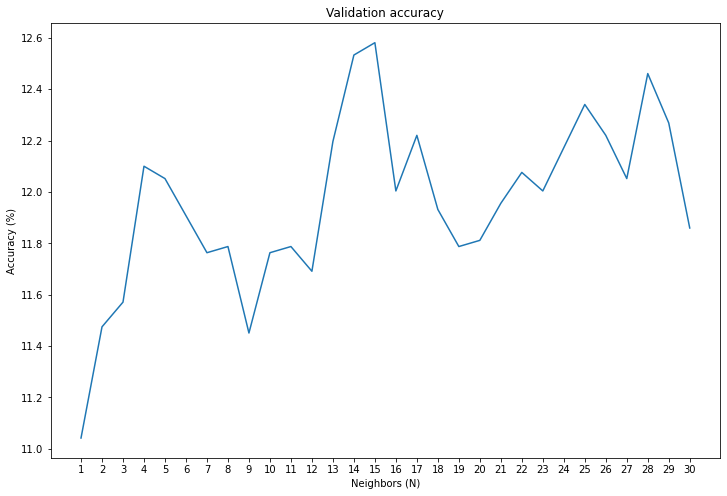

In [ ]:
knn_accuracy(recent_df)

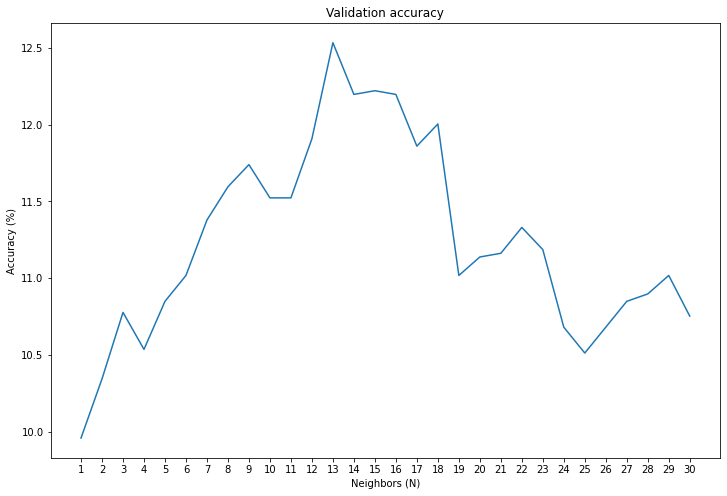

In [ ]:
#highest accuracy is lower for norm_recent_df
knn_accuracy(norm_recent_df)

#Looking at trends by year

##2020


In [ ]:
def cut_df(year):
  df = year_df(all_df,year)
  df['cut'] = pd.qcut(df['popularity'], q=10, labels=['not_popular', '2', '3', '4', '5', '6', '7', '8', '9', 'popular'])
  df['cut'] = df['cut'].astype(str)
  return df

In [ ]:
def boxplot_pop_not_pop(year,att):
  df = cut_df(year)
  pop_df = df[(df['cut'] == 'popular') | (df['cut'] == 'not_popular')]
  pop_df.boxplot(column = att, by = 'cut')

In [ ]:
def compare_percent(year,att,n):
  df = cut_df(year)
  pop_df = df[(df['cut'] == 'popular') | (df['cut'] == 'not_popular')]
  for pop, group in pop_df.groupby('cut'):
    percent = 100*group[group[att] > n].shape[0]/group.shape[0]
    print(f'{percent: .2f}% of {pop} songs in {year} had {att} above {n}')

In [ ]:
def compare_percent_graph(att,n):
  p =[]
  np = []
  year = recent_df['year'].unique()

  for y in year:
    df = cut_df(y)
    pop_df = df[df['cut'] == 'popular']
    percent = 100*pop_df[pop_df[att] > n].shape[0]/pop_df.shape[0]
    p.append(percent)

  for y in year:
    df = cut_df(y)
    not_pop_df = df[df['cut'] == 'not_popular']
    percent = 100*not_pop_df[not_pop_df[att] > n].shape[0]/not_pop_df.shape[0]
    np.append(percent)

  plt.plot(year, p, label = 'popular')
  plt.plot(year, np, label = 'not popular')
  plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


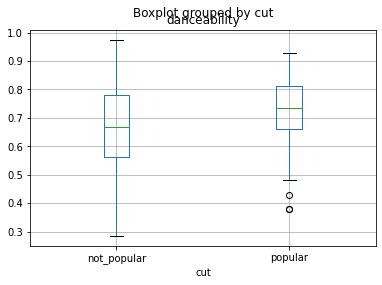

In [ ]:
boxplot_pop_not_pop(2020,'danceability')

In [ ]:
for y in recent_df['year'].unique():
  compare_percent(y,'danceability',.6)
  print(f'-'*75)

#Scaling all data. (dividing each row by the year's mean/median)


In [328]:
col = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
      'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
      'speechiness', 'tempo', 'valence']
def scale_data(df, cols):

  for y in df['year'].unique():
      for att in cols:
        att_by_year = df[df['year'] == y][att]
        if att_by_year.mean() != 0:
          df.loc[df['year'] == y, att] = att_by_year / att_by_year.mean()
    
  return df

In [329]:
normalize_df = scale_data(all_df, col)

In [330]:
all_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,cut
4,1.027104,0.439064,2.783360,1.016638,0.0,1.688664,2.150450,0.469306,1.019201,1.339506,0.119362,0.668741,0.583487,0.171235,1928,1
11,1.026066,0.355433,0.344546,0.410144,0.0,1.694244,1.954955,0.460686,1.823346,0.000000,0.119362,0.499978,0.807309,0.854941,1928,1
40,1.013616,0.637688,0.871218,0.413632,0.0,1.296254,1.172973,1.106222,1.265447,1.339506,0.119362,0.522059,0.756921,0.118357,1928,1
42,1.027104,0.704593,1.351372,0.348348,0.0,1.679365,0.977477,0.507617,1.441743,0.000000,0.238724,0.507864,0.677222,0.333575,1928,1
47,1.021916,0.742227,0.558560,0.225255,0.0,1.534304,0.195495,0.732692,1.461063,1.339506,0.238724,0.518905,0.793808,0.681976,1928,1


In [389]:
all_df.loc[[79341]]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cut
79341,0.946,"['George Gershwin', 'Jascha Heifetz', 'Brooks ...",0.397,142347,0.133,0,6mkXQQmipzkFy5dZZ35UcC,0.17,2,0.103,-18.558,0,It Ain't Necessarily So,30,1934,0.0462,106.359,0.325,1934,4


In [339]:
normalize_df['popularity'].nlargest(5)

79340    10.024138
78940     9.929159
80140     9.703751
79341     8.844828
80240     8.772304
Name: popularity, dtype: float64

In [338]:
normalize_df.to_csv(drive_dir + 'data/normalize_data.csv')

In [336]:
def median_line(df, att):
  years = df['year'].unique()
  years.sort()
  median = []
  for y in years:
    y_df = year_df(df,y)
    median.append(y_df[att].median())

  plt.plot(years, median)
  plt.title(att.title())
  plt.figure(figsize =(8,8))


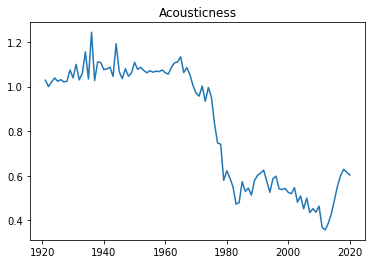

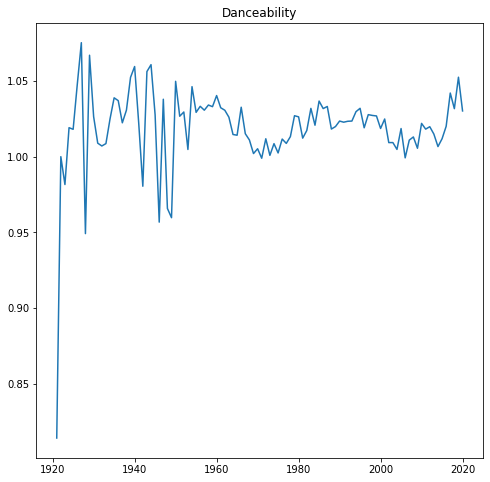

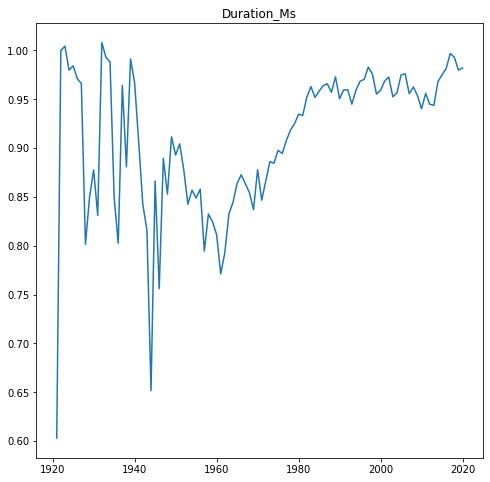

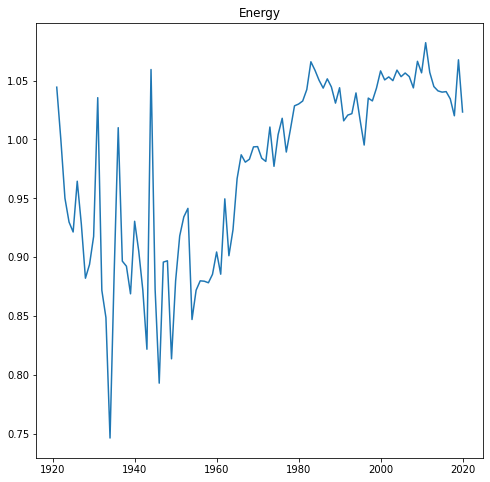

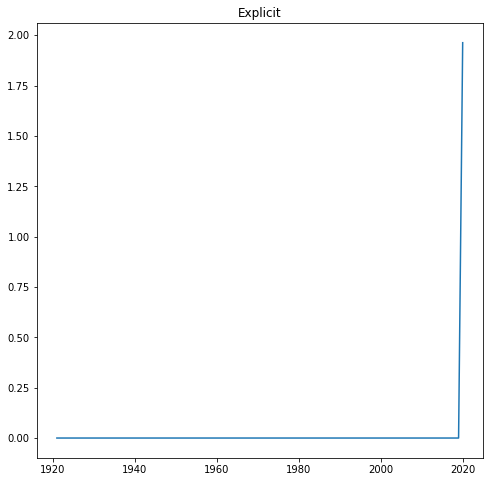

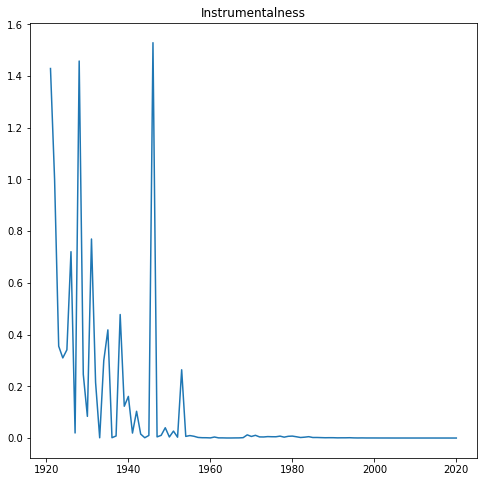

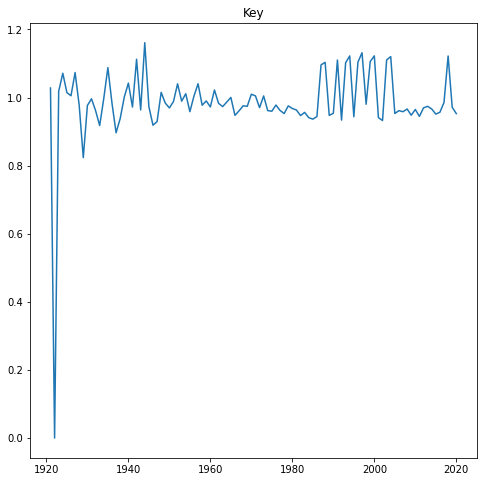

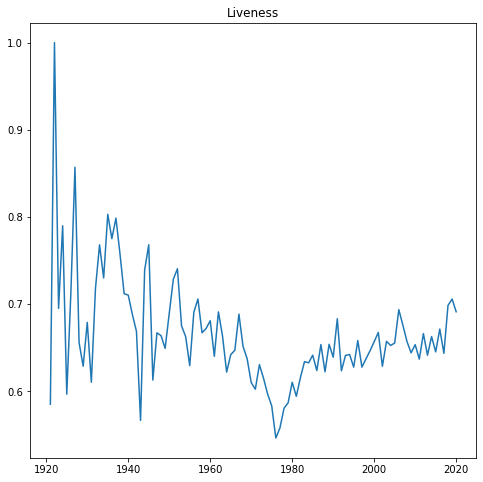

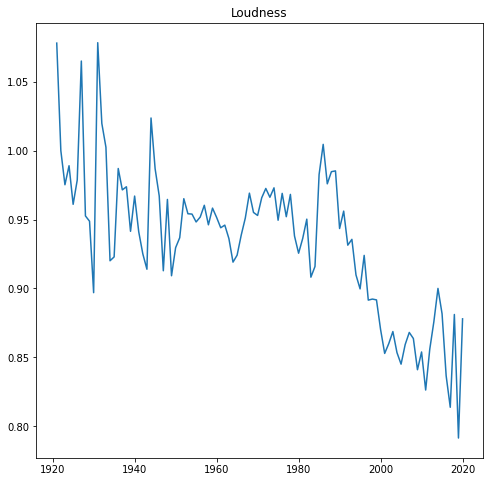

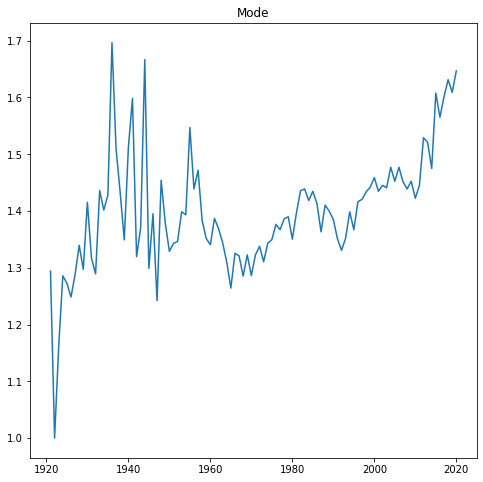

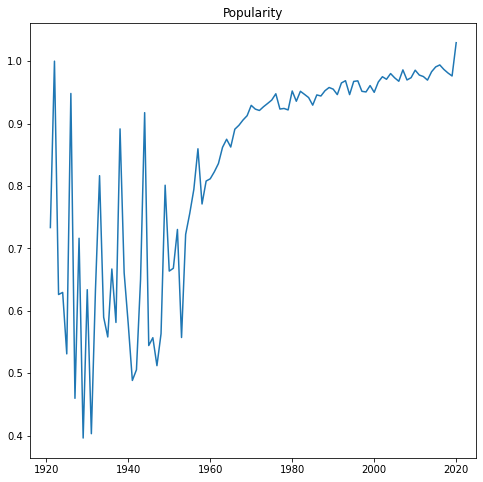

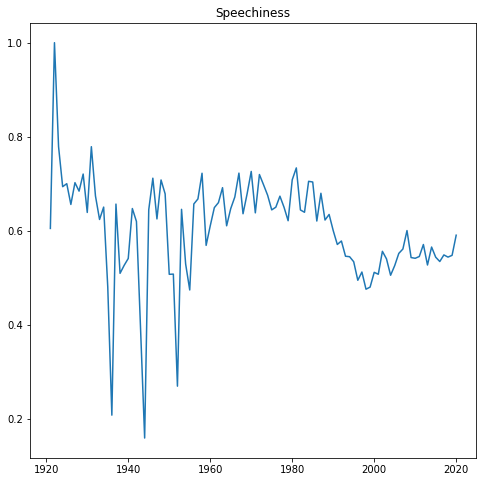

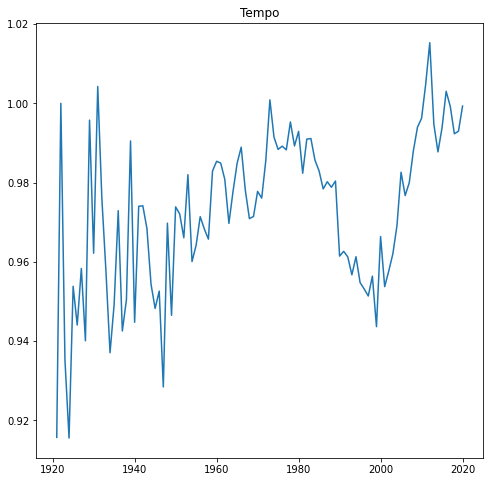

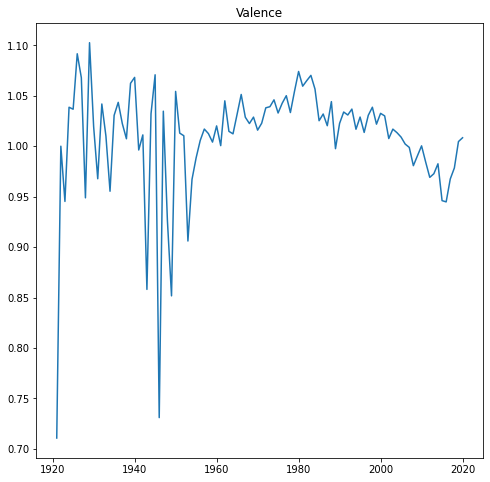

<Figure size 576x576 with 0 Axes>

In [337]:
for att in col:
  median_line(normalize_df, att)